<a href="https://colab.research.google.com/github/Alex00999/data-vis/blob/main/%D0%9B%D0%A02_%D0%9C%D0%B0%D0%BB%D0%B0%D1%85%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly`, `altair`, `bokeh`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn` (альтернативно можно `matplotlib` со стилями из `seaborn`), второй – с помощью `plotly`, `altair` или `bokeh` на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.

# Данные


По [ссылке](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

df = pd.read_csv("song_data.csv")

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [61]:
numeric_cols = [
    "BPM", "energy", "danceability", "happiness",
    "acousticness", "instrumentalness", "liveness", "speechiness"
]

# Замена прочерков и NaN на 0, преобразование в float
for col in numeric_cols:
    df[col] = df[col].replace("-", 0).fillna(0).astype(float)

# Очистка и преобразование loudness
df["loudness"] = df["loudness"].astype(str).str.replace(" dB", "", regex=False)
df["loudness"] = df["loudness"].replace("-", 0).fillna(0).astype(float)

# Проверка результата
df[numeric_cols + ["loudness"]].head()

,BPM,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,loudness
0,110.0,36.0,64.0,23.0,58.0,0.0,10.0,3.0,10.0
1,103.0,78.0,70.0,82.0,2.0,0.0,18.0,4.0,6.0
2,103.0,70.0,56.0,11.0,4.0,2.0,32.0,5.0,10.0
3,160.0,55.0,56.0,40.0,5.0,0.0,8.0,7.0,8.0
4,145.0,63.0,66.0,77.0,31.0,0.0,16.0,5.0,8.0


## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

In [ ]:
corr_cols = [
    "BPM", "energy", "danceability", "happiness",
    "acousticness", "instrumentalness", "liveness", "speechiness"
]
corr_matrix = df[corr_cols].corr()
corr_df = corr_matrix.reset_index().melt(id_vars="index")
corr_df.columns = ["feature1", "feature2", "correlation"]

heatmap = alt.Chart(corr_df).mark_rect().encode(
    x=alt.X("feature1:N", title=None),
    y=alt.Y("feature2:N", title=None),
    color=alt.Color("correlation:Q", scale=alt.Scale(scheme="redblue", domainMid=0)),
    tooltip=["feature1", "feature2", "correlation"]
).properties(
    title="Корреляция между характеристиками песен (Altair)",
    width=400,
    height=400
) + alt.Chart(corr_df).mark_text(baseline="middle").encode(
    x="feature1:N",
    y="feature2:N",
    text=alt.Text("correlation:Q", format=".2f"),
    color=alt.condition(
        "datum.correlation > 0.5 || datum.correlation < -0.5",
        alt.value("black"),
        alt.value("gray")
    )
)

heatmap

alt.LayerChart(...)

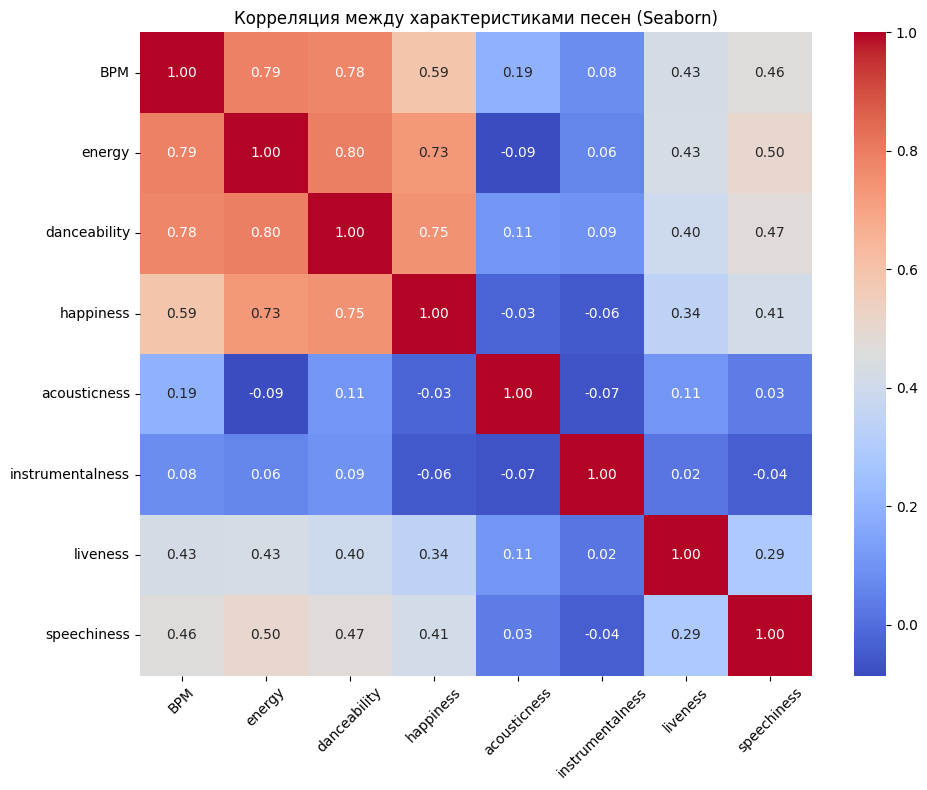

In [ ]:
# Список признаков
corr_cols = [
    "BPM", "energy", "danceability", "happiness",
    "acousticness", "instrumentalness", "liveness", "speechiness"
]

# Корреляционная матрица
corr_matrix = df[corr_cols].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между характеристиками песен (Seaborn)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Судя по графику, наибольшую положительную корреляцию с танцевальностью имеют энергичность и темп (BPM), а акустичность слабо или отрицательно связана с другими характеристиками.

## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



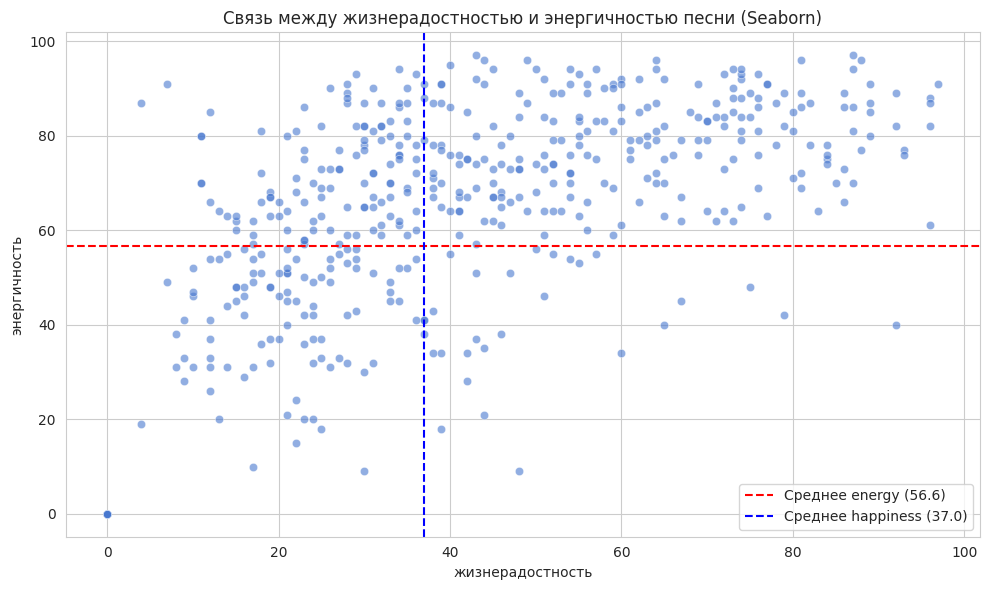

In [62]:
# Вычисление средних значений
happiness_mean = df["happiness"].mean()
energy_mean = df["energy"].mean()

# Построение scatter plot с seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="happiness", y="energy", alpha=0.6)
plt.axhline(energy_mean, color="red", linestyle="--", label=f"Среднее energy ({energy_mean:.1f})")
plt.axvline(happiness_mean, color="blue", linestyle="--", label=f"Среднее happiness ({happiness_mean:.1f})")
plt.title("Связь между жизнерадостностью и энергичностью песни (Seaborn)")
plt.xlabel("жизнерадостность")
plt.ylabel("энергичность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# Средние значения
mean_lines = pd.DataFrame({
    "x": [df["happiness"].mean()],
    "y": [df["energy"].mean()]
})

# Основной график
scatter = alt.Chart(df).mark_circle(size=60, opacity=0.5).encode(
    x=alt.X("happiness:Q", title="жизнерадостность"),
    y=alt.Y("energy:Q", title="энергичность"),
    tooltip=["artist_name", "song_name", "happiness", "energy"]
)

# Средние линии
mean_x = alt.Chart(mean_lines).mark_rule(color="blue", strokeDash=[4, 4]).encode(x="x:Q")
mean_y = alt.Chart(mean_lines).mark_rule(color="red", strokeDash=[4, 4]).encode(y="y:Q")

# Объединение
final_plot = (scatter + mean_x + mean_y).properties(
    title="Связь между жизнерадостностью и энергичностью песни (Altair)",
    width=600,
    height=400
)

final_plot

alt.LayerChart(...)

На графике видно, что большинство песен имеют высокую энергичность при умеренной жизнерадостности, но чёткой линейной зависимости между этими параметрами не наблюдается.

## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

<ipython-input-2-1bc6506be760>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


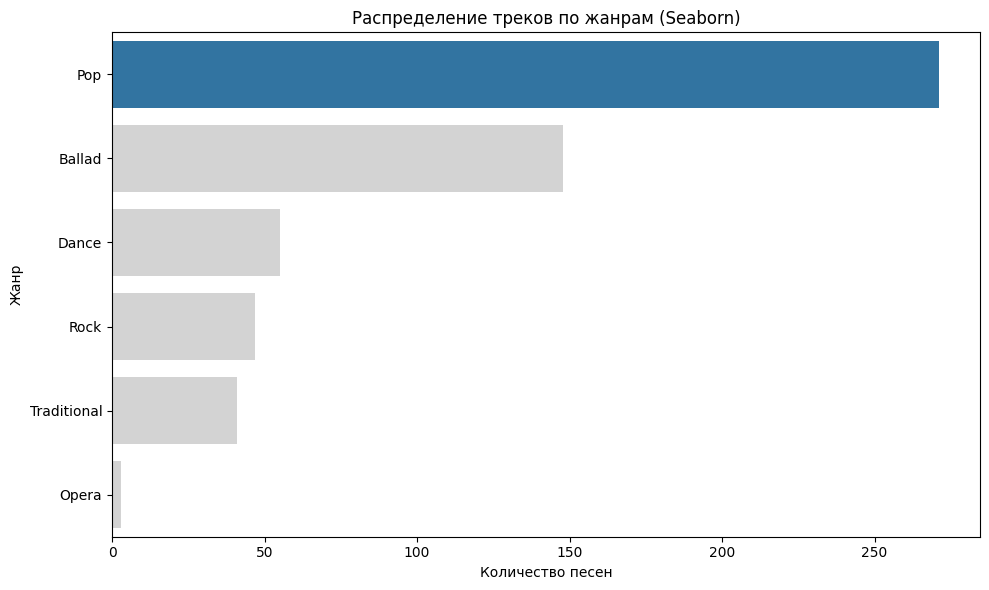

In [ ]:
# Подсчёт количества песен по жанрам
genre_counts = df["style"].value_counts().reset_index()
genre_counts.columns = ["style", "count"]

# Определение самого популярного жанра
top_genre = genre_counts.iloc[0]["style"]

# Цвета: яркий для топ-жанра, серые — для остальных
colors = ["#1f77b4" if style == top_genre else "#d3d3d3" for style in genre_counts["style"]]

# Seaborn: горизонтальная диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_counts,
    y="style",
    x="count",
    palette=colors
)
plt.title("Распределение треков по жанрам (Seaborn)")
plt.xlabel("Количество песен")
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()

In [ ]:
# Добавим флаг для цвета
genre_counts["highlight"] = genre_counts["style"] == top_genre

# Altair-график
alt.Chart(genre_counts).mark_bar().encode(
    x=alt.X("count:Q", title="Количество песен"),
    y=alt.Y("style:N", sort="-x", title="Жанр"),
    color=alt.condition("datum.highlight", alt.value("#1f77b4"), alt.value("#d3d3d3")),
    tooltip=["style", "count"]
).properties(
    title="Распределение треков по жанрам (Altair)",
    width=600,
    height=400
)

alt.Chart(...)

Диаграмма показывает, что жанр Pop значительно преобладает среди конкурсных треков, почти в два раза опережая ближайший жанр Ballad по количеству песен.

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

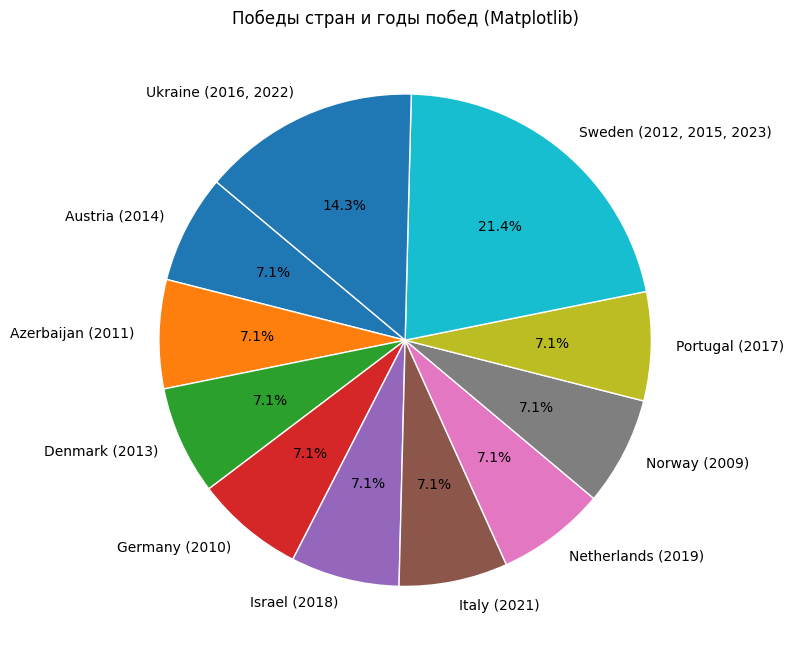

In [ ]:
# Подготовка данных
winners = df[df["final_place"] == 1].copy()
winners = winners[winners["country"].notna() & winners["year"].notna()]

winners_grouped = winners.groupby("country").agg({
    "year": lambda x: ", ".join(map(str, sorted(x))),
    "final_place": "count"
}).reset_index()
winners_grouped.columns = ["country", "win_years", "win_count"]
winners_grouped["label"] = winners_grouped["country"] + " (" + winners_grouped["win_years"] + ")"

# Построение диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    winners_grouped["win_count"],
    labels=winners_grouped["label"],
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
plt.title("Победы стран и годы побед (Matplotlib)")
plt.tight_layout()
plt.show()

In [ ]:
# Подготовка данных
winners = df[df["final_place"] == 1].copy()
winners = winners[winners["country"].notna() & winners["year"].notna()]
winners_grouped = winners.groupby("country").agg({
    "year": lambda x: ", ".join(map(str, sorted(x))),
    "final_place": "count"
}).reset_index()
winners_grouped.columns = ["country", "win_years", "win_count"]

# Добавим колонку с меткой для легенды
winners_grouped["legend_label"] = winners_grouped["country"] + " (" + winners_grouped["win_years"] + ")"

# Pie chart с кастомной легендой
alt.Chart(winners_grouped).mark_arc().encode(
    theta=alt.Theta("win_count:Q", title="Количество побед"),
    color=alt.Color("legend_label:N", title="Страна (годы побед)", scale=alt.Scale(scheme="category20")),
    tooltip=[
        alt.Tooltip("country:N", title="Страна"),
        alt.Tooltip("win_count:Q", title="Побед"),
        alt.Tooltip("win_years:N", title="Годы побед")
    ]
).properties(
    title="Победы стран и годы побед (Altair с легендой)",
    width=500,
    height=500
)

alt.Chart(...)

Круговая диаграмма показывает, что чаще всего побеждала Швеция (3 раза), за ней следует Украина (2 победы), а остальные страны выигрывали по одному разу.

## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

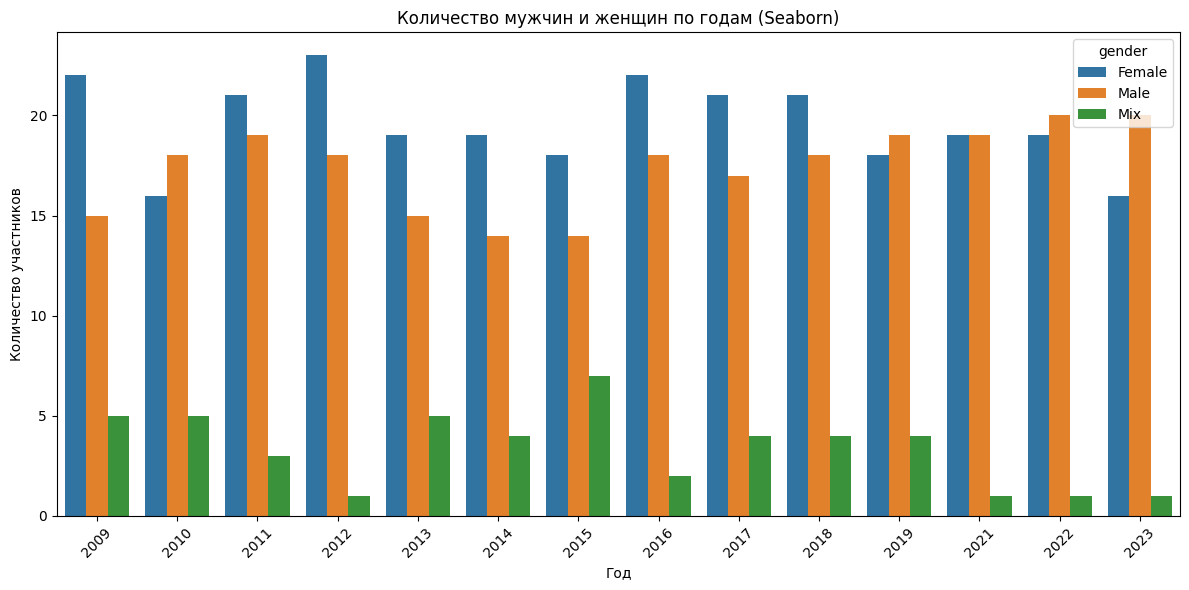

In [ ]:
gender_year_counts = df.groupby(["year", "gender"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_year_counts, x="year", y="count", hue="gender")
plt.title("Количество мужчин и женщин по годам (Seaborn)")
plt.xlabel("Год")
plt.ylabel("Количество участников")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
alt.Chart(gender_year_counts).mark_bar().encode(
    x=alt.X("year:O", title="Год"),
    y=alt.Y("count:Q", title="Количество участников"),
    color=alt.Color("gender:N", title="Пол"),
    tooltip=["year", "gender", "count"]
).properties(
    title="Количество мужчин и женщин по годам (Altair)",
    width=600,
    height=400
)

alt.Chart(...)

График показывает, что в большинстве лет с 2009 по 2023 количество женщин-участниц превышало или соперничало с количеством мужчин, а смешанных коллективов было заметно меньше и их число оставалось стабильным.

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

In [6]:
# Фильтрация жанров с >= 5 песнями
valid_styles = df["style"].value_counts()
valid_styles = valid_styles[valid_styles >= 5].index

# Отфильтрованные данные
filtered_df = df[df["style"].isin(valid_styles)].copy()

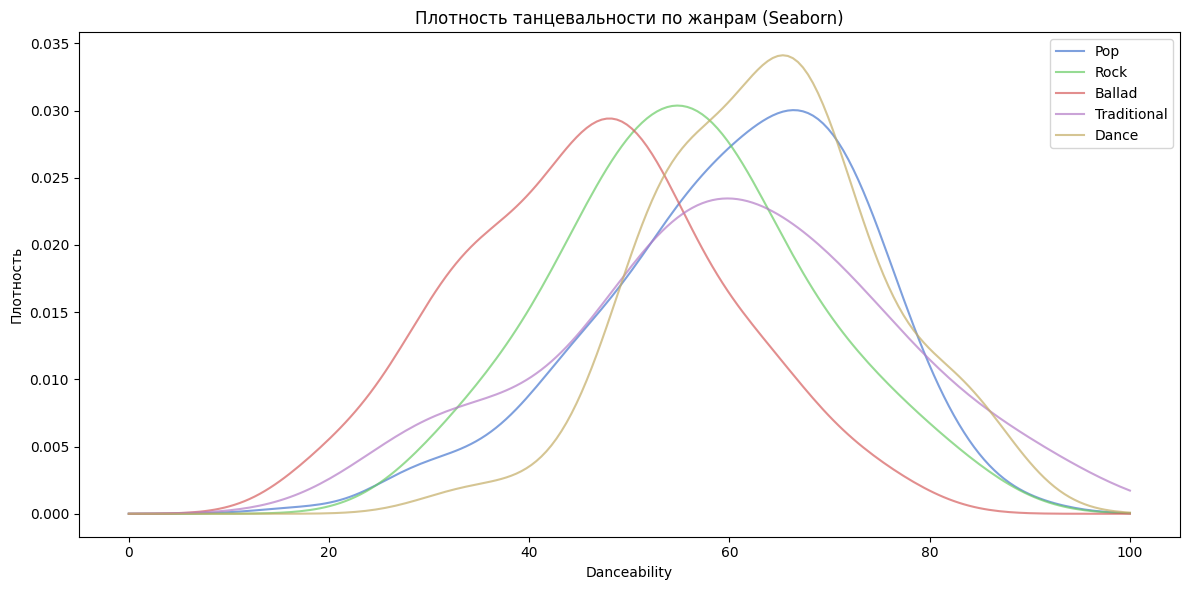

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Применяем стиль seaborn
plt.style.use("seaborn-v0_8-muted")

# Убедимся, что danceability — float
df["danceability"] = pd.to_numeric(df["danceability"], errors="coerce")

# Фильтрация жанров с >= 5 песнями
valid_styles = df["style"].value_counts()
valid_styles = valid_styles[valid_styles >= 5].index
filtered_df = df[df["style"].isin(valid_styles)].copy()

# Построение KDE вручную с matplotlib
plt.figure(figsize=(12, 6))
for style in filtered_df["style"].unique():
    values = filtered_df[filtered_df["style"] == style]["danceability"].dropna().values
    if len(values) < 2:
        continue
    kde = gaussian_kde(values)
    x = np.linspace(0, 100, 200)
    y = kde(x)
    plt.plot(x, y, label=style, alpha=0.7)

plt.title("Плотность танцевальности по жанрам (Seaborn)")
plt.xlabel("Danceability")
plt.ylabel("Плотность")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
from bokeh.plotting import figure, show
from bokeh.palettes import Category20
from bokeh.models import Legend
from bokeh.io import output_notebook
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

output_notebook()

# Убедимся, что danceability — float
df["danceability"] = pd.to_numeric(df["danceability"], errors="coerce")

# Фильтрация жанров с >= 5 песнями
valid_styles = df["style"].value_counts()
valid_styles = valid_styles[valid_styles >= 5].index
filtered_df = df[df["style"].isin(valid_styles)].copy()

# Подготовка фигуры
p = figure(title="Плотность танцевальности по жанрам (Bokeh)",
           width=700, height=400,
           x_axis_label='Danceability', y_axis_label='Плотность')

colors = Category20[20]
legend_items = []

# Рисуем кривые KDE
for i, style in enumerate(filtered_df["style"].unique()):
    values = pd.to_numeric(filtered_df[filtered_df["style"] == style]["danceability"], errors="coerce").dropna().values
    if len(values) < 2:
        continue
    kde = gaussian_kde(values)
    x = np.linspace(0, 100, 200)
    y = kde(x)
    line = p.line(x, y, line_width=2, color=colors[i % len(colors)], alpha=0.6)
    legend_items.append((style, [line]))

# Добавляем легенду
legend = Legend(items=legend_items)
p.add_layout(legend, 'right')
p.legend.click_policy = "hide"

show(p)

На графике видно, что песни жанров Dance и Pop обладают самой высокой танцевальностью, в то время как Ballad и Traditional характеризуются более низкими значениями этого параметра.

## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

<ipython-input-17-3376183902>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["final_place"].notna()], x="country", y="final_place", palette="Set2")


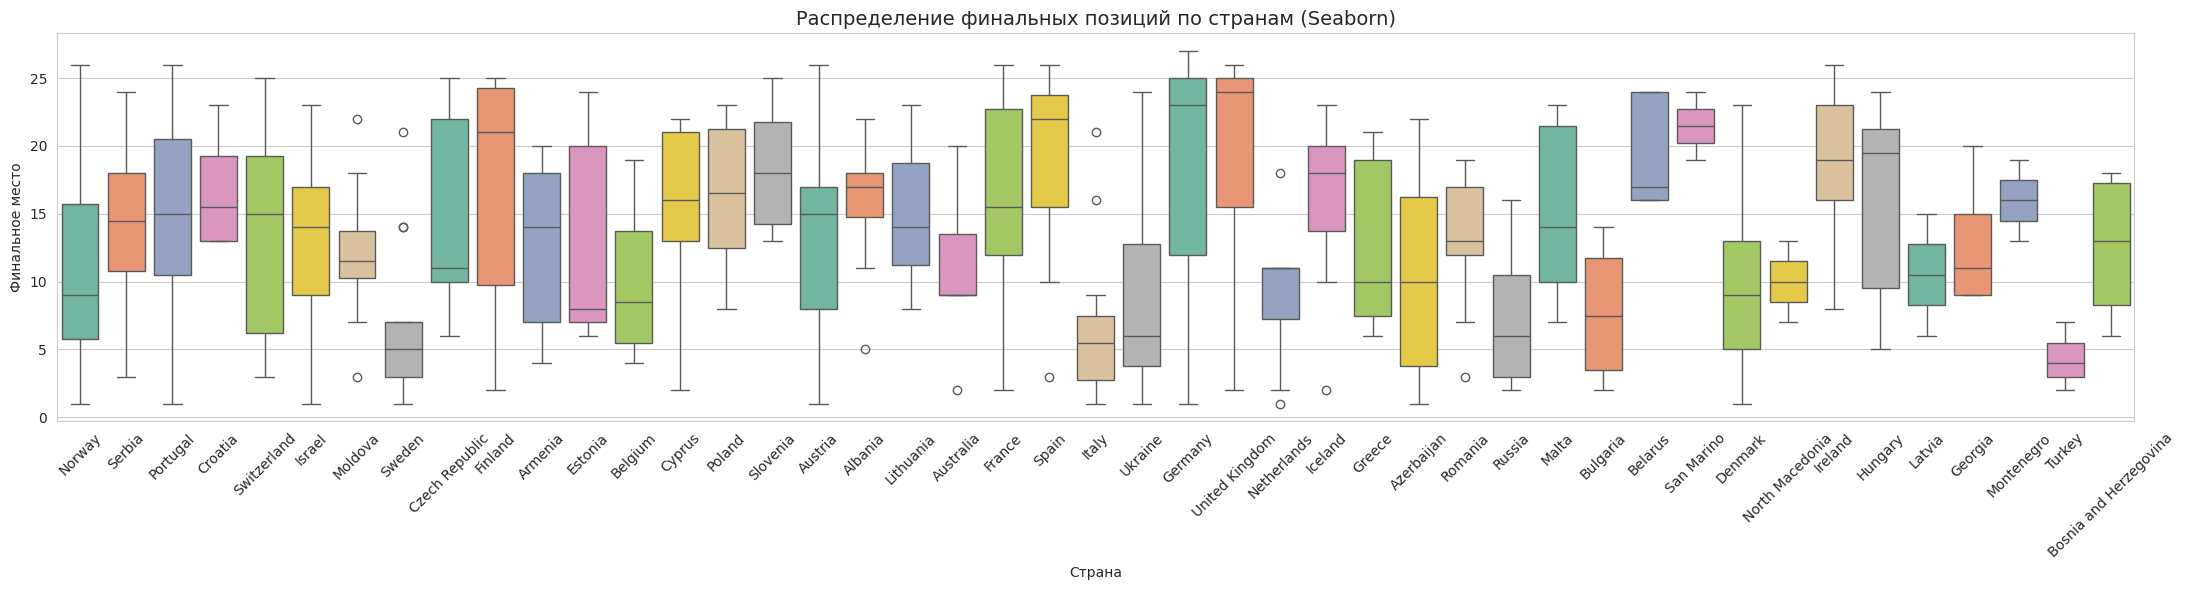

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
df["final_place"] = pd.to_numeric(df["final_place"], errors="coerce")

plt.figure(figsize=(22, 6))
sns.boxplot(data=df[df["final_place"].notna()], x="country", y="final_place", palette="Set2")
plt.title("Распределение финальных позиций по странам (Seaborn)", fontsize=14)
plt.xlabel("Страна")
plt.ylabel("Финальное место")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import altair as alt

box_df = df[df["final_place"].notna()].copy()
box_df["final_place"] = pd.to_numeric(box_df["final_place"], errors="coerce")

alt.Chart(box_df).mark_boxplot(extent="min-max").encode(
    x=alt.X("country:N", title="Страна", sort="-y"),
    y=alt.Y("final_place:Q", title="Финальное место"),
    color=alt.Color("country:N", legend=None)
).properties(
    title="Распределение финальных позиций по странам (Altair)",
    width=1200,
    height=400
)

alt.Chart(...)

Диаграмма показывает, что такие страны, как Швеция, Украина и Италия, чаще занимают высокие места в финале, тогда как результаты стран вроде Великобритании, Литвы и Грузии более разбросаны и менее стабильны.

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

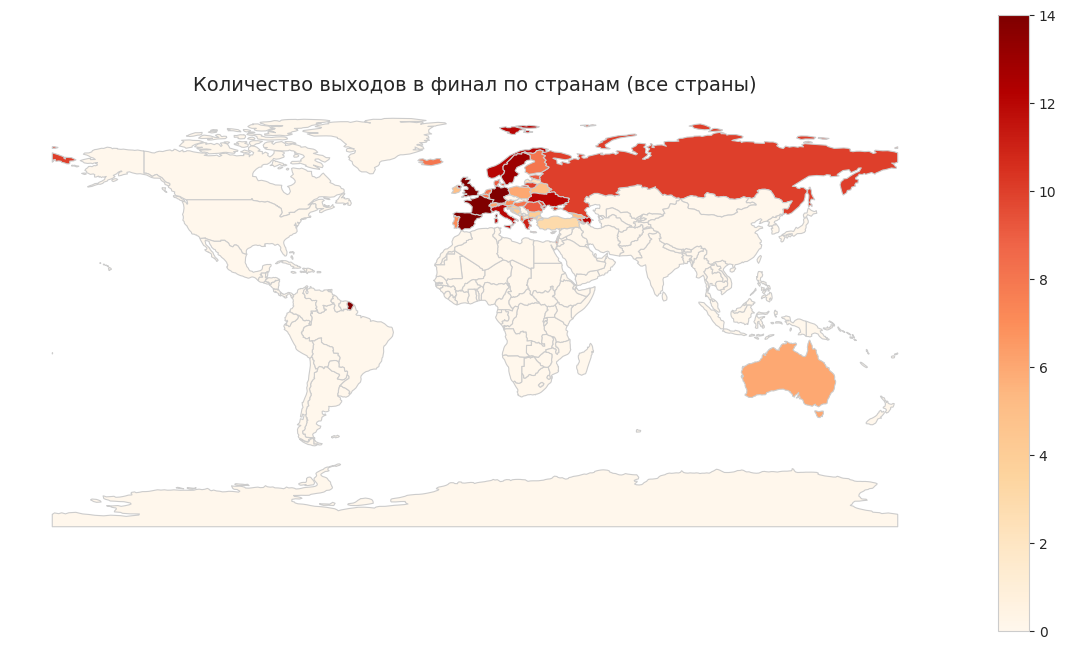

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка GeoJSON карты мира
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Приведение финальных мест к числу
df["final_place"] = pd.to_numeric(df["final_place"], errors="coerce")

# Подсчёт финалов
finals_by_country = df[df["final_place"].notna()].groupby("country").size().reset_index(name="finals_count")

# Приведение названий стран для совпадения
rename_map = {
    "Czech Republic": "Czechia",
    "Macedonia": "North Macedonia",
    "Bosnia and Herz.": "Bosnia and Herzegovina",
    "Dem. Rep. Congo": "Congo (Kinshasa)",
    "Central African Rep.": "Central African Republic",
    "Eq. Guinea": "Equatorial Guinea",
    "eSwatini": "Eswatini",
    "Myanmar (Burma)": "Myanmar",
    "S. Sudan": "South Sudan",
    "Solomon Is.": "Solomon Islands",
    "Timor-Leste": "East Timor",
    "United States of America": "United States",
    "United Kingdom": "United Kingdom",
}
world["country"] = world["ADMIN"].replace(rename_map)

# Объединение без удаления остальных стран
merged = world.merge(finals_by_country, how="left", on="country")

# Заполнение отсутствующих финалов нулями
merged["finals_count"] = merged["finals_count"].fillna(0)

# Построение карты
fig, ax = plt.subplots(figsize=(15, 8))
merged.plot(column="finals_count", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Количество выходов в финал по странам (все страны)", fontsize=14)
ax.axis("off")
plt.show()

In [43]:
import pandas as pd
import json
import urllib.request
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import OrRd

df["final_place"] = pd.to_numeric(df["final_place"], errors="coerce")
finals_by_country = (
    df[df["final_place"].notna()]
    .groupby("country")
    .size()
    .reset_index(name="finals_count")
    .set_index("country")["finals_count"]
    .to_dict()
)

geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
with urllib.request.urlopen(geojson_url) as response:
    countries_geo = json.load(response)

for f in countries_geo["features"]:
    name = f["properties"]["name"]
    f["id"] = name
    f["properties"]["finals_count"] = finals_by_country.get(name, 0)

geosource = GeoJSONDataSource(geojson=json.dumps(countries_geo))

max_finals = max(finals_by_country.values()) if finals_by_country else 1

# разворачиваем палитру, чтобы 0 был самым светлым
palette = OrRd[9][::-1]
mapper = LinearColorMapper(palette=palette, low=0, high=max_finals)

p = figure(
    width=800,
    height=400,
    toolbar_location="left",
    background_fill_color="white",
    border_fill_color="white",
    x_axis_type=None,
    y_axis_type=None,
    x_axis_location=None,
    y_axis_location=None,
    title="Количество выходов в финал по странам",
)
p.grid.grid_line_color = None

p.patches(
    "xs",
    "ys",
    source=geosource,
    fill_color={"field": "finals_count", "transform": mapper},
    line_color="white",
    line_width=0.5,
)

p.add_tools(HoverTool(tooltips=[("Страна", "@id"), ("Финалы", "@finals_count")]))

color_bar = ColorBar(color_mapper=mapper, label_standoff=8, title="Финалы")
p.add_layout(color_bar, "right")

output_file("finals_world_map_bokeh.html")
show(p)

Карта показывает, что страны Европы, особенно Восточной и Северной, чаще выходят в финал Евровидения, в то время как большинство стран мира вообще не участвуют в конкурсе.

## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [49]:
import plotly.express as px
import pandas as pd

# Подготовка данных
df["final_place"] = pd.to_numeric(df["final_place"], errors="coerce")
top3 = df[df["final_place"].isin([1, 2, 3])]
counts = top3["country"].value_counts().reset_index()
counts.columns = ["country", "top3_count"]

# Построение Treemap
fig = px.treemap(
    counts,
    path=["country"],
    values="top3_count",
    color="top3_count",
    color_continuous_scale="Viridis",
    title="Treemap: Вхождения стран в топ-3 Евровидения"
)

fig.update_traces(
    textinfo="label+value",
    textfont_size=16,
    selector=dict(type='treemap')
)

fig.update_layout(
    height=700,
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title="Попадания в топ-3",
        titlefont=dict(size=14),
        tickfont=dict(size=12)
    )
)

fig.show()

Treemap показывает, что Швеция, Россия и Италия чаще других входили в топ-3 Евровидения, тогда как большинство стран делали это лишь однажды.

## Дополнительное задание

На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью plotly.

In [54]:
import plotly.express as px
import pandas as pd

# Преобразуем final_place в число
df["final_place"] = pd.to_numeric(df["final_place"], errors="coerce")

# Отбираем артистов с участием более одного раза
repeat_artists = df["artist_name"].value_counts()
repeat_artists = repeat_artists[repeat_artists > 1].index
filtered = df[df["artist_name"].isin(repeat_artists)].copy()
filtered = filtered[filtered["final_place"].notna()]

grouped = (
    filtered.groupby("artist_name")
    .apply(lambda g: ", ".join(
        f"{int(row['year'])}: {int(row['final_place'])}" for _, row in g.iterrows()
    ))
    .reset_index(name="performance_info")
)

grouped["count"] = filtered["artist_name"].value_counts().loc[grouped["artist_name"]].values

grouped["label"] = grouped["artist_name"] + "\n" + grouped["performance_info"]

fig = px.pie(
    grouped,
    names="label",
    values="count",
    title="Артисты, участвовавшие несколько раз, и их места по годам",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo="label", textfont_size=13)
fig.update_layout(showlegend=False, height=700)
fig.show()

<ipython-input-54-2329244389>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Круговая диаграмма показывает артистов, участвовавших в Евровидении более одного раза, с указанием годов и занятых ими мест — наглядно видно, кто стабильно выступал успешно, а кто демонстрировал разные результаты.

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).